In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
from scipy import stats
import statsmodels.api as sm

with open("Data/cars.csv") as file:
    cars = pd.read_csv(file)

cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [70]:
#cars.set_index("model_year", inplace=True)
cars.dropna(inplace=True)


In [71]:
cars["model_year"].value_counts(sort=False)

70    29
71    27
72    28
73    40
74    26
75    30
76    34
77    28
78    36
79    29
80    27
81    28
82    30
Name: model_year, dtype: int64

In [72]:
cars["origin"].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [73]:
cars["cylinders"].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

<AxesSubplot: xlabel='model_year', ylabel='acceleration'>

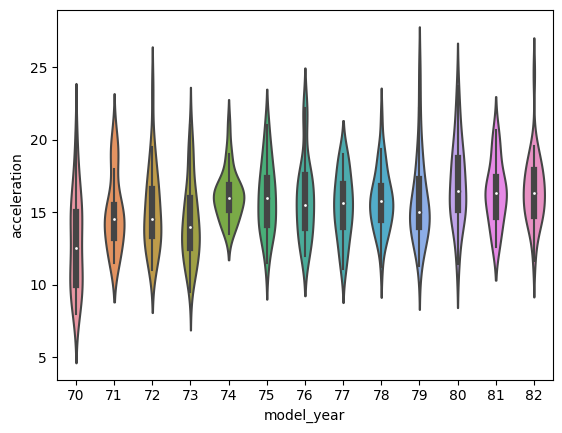

In [74]:
sns.violinplot(data = cars, x="model_year", y="acceleration")

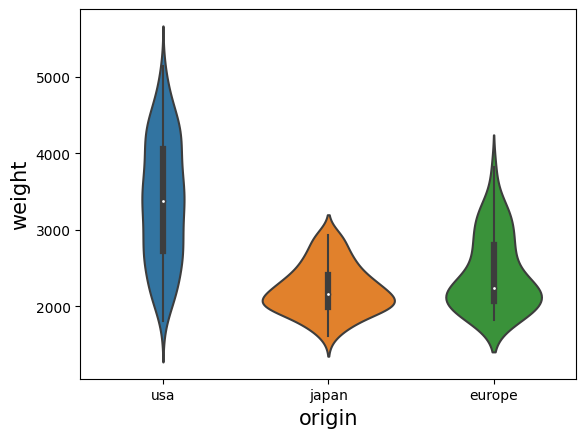

In [75]:
fig = sns.violinplot(data = cars, x="origin", y="weight", )
fig.set_ylabel("weight", fontsize=15)
fig.set_xlabel("origin", fontsize=15)
plt.savefig("images/origin_weight.png")

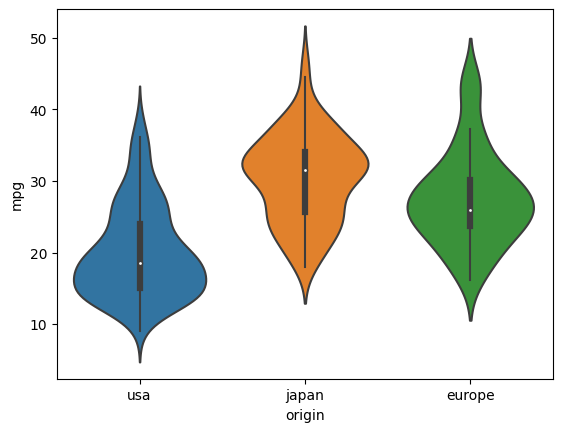

In [76]:
fig = sns.violinplot(data = cars, x="origin", y="mpg")

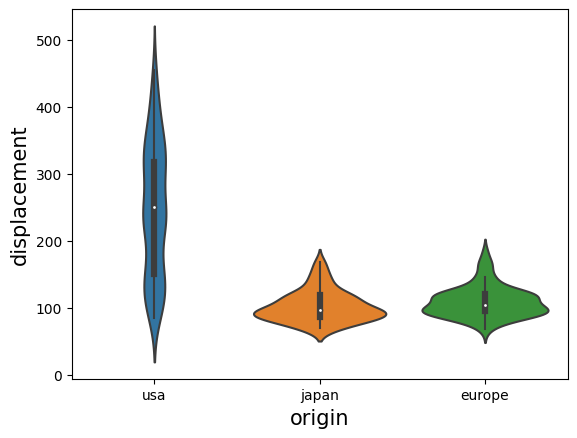

In [77]:
fig = sns.violinplot(data = cars, x="origin", y="displacement", )
fig.set_ylabel("displacement", fontsize=15)
fig.set_xlabel("origin", fontsize=15)
plt.savefig("images/origin_displacement.png")

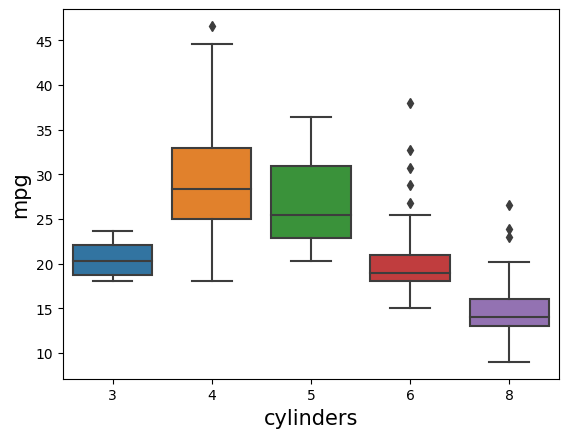

In [78]:
fig = sns.boxplot(data = cars, x="cylinders", y="mpg", )
fig.set_ylabel("mpg", fontsize=15)
fig.set_xlabel("cylinders", fontsize=15)
plt.savefig("images/cylinders_mpg.png")

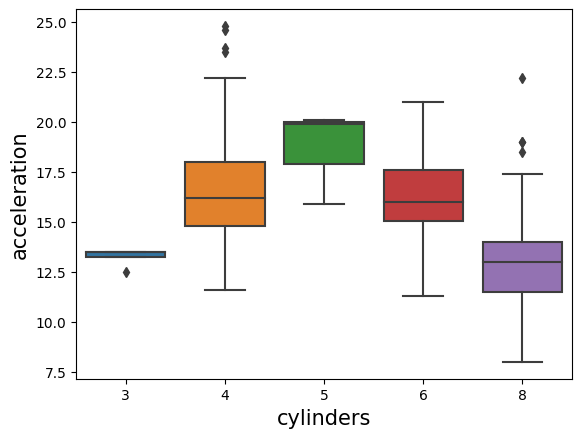

In [79]:
fig = sns.boxplot(data = cars, x="cylinders", y="acceleration", )
fig.set_ylabel("acceleration", fontsize=15)
fig.set_xlabel("cylinders", fontsize=15)
plt.savefig("images/cylinders_acceleration.png")

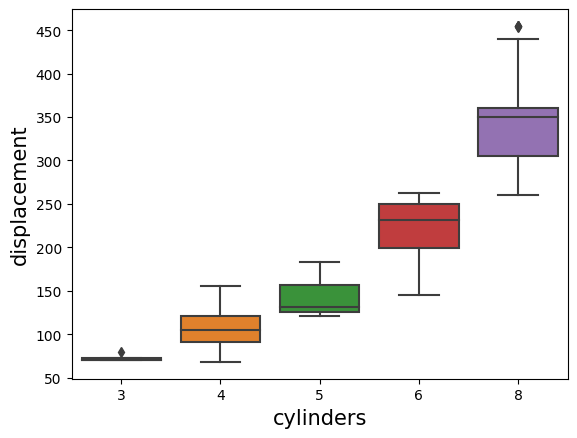

In [80]:
fig = origin_violin = sns.boxplot(data = cars, x="cylinders", y="displacement", )
fig.set_ylabel("displacement", fontsize=15)
fig.set_xlabel("cylinders", fontsize=15)
plt.savefig("images/cylinders_displacement.png")

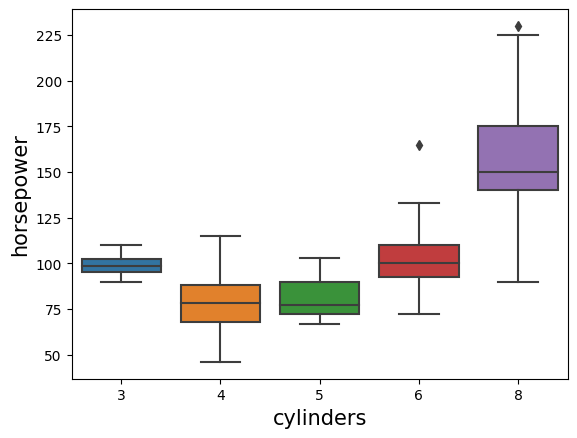

In [81]:
fig = origin_violin = sns.boxplot(data = cars, x="cylinders", y="horsepower")
fig.set_ylabel("horsepower", fontsize=15)
fig.set_xlabel("cylinders", fontsize=15)
plt.savefig("images/cylinders_horsepower.png")

<AxesSubplot: xlabel='origin', ylabel='weight'>

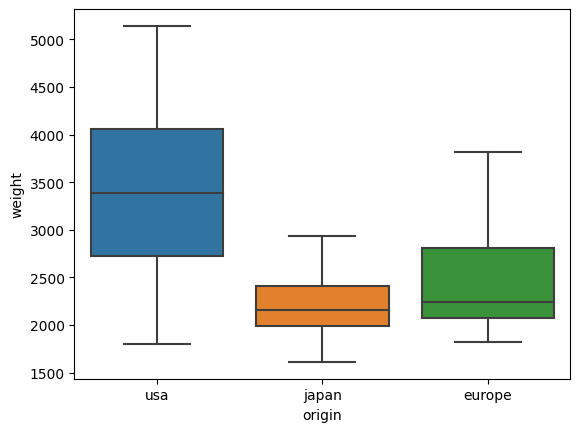

In [82]:
sns.boxplot(data = cars, x="origin", y="weight")

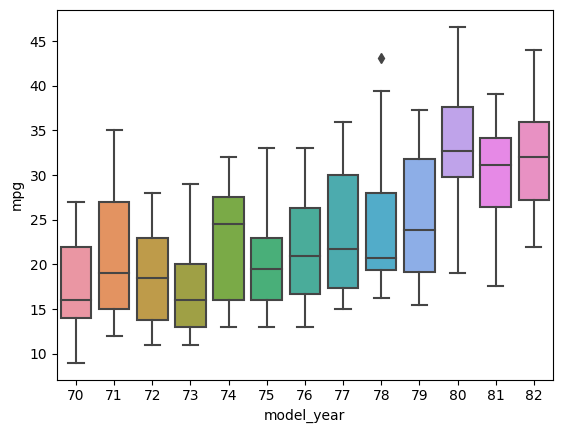

In [83]:
# 74 verkar vara en outlier, undersök vad som är speciellt med det året.

sns.boxplot(data = cars, x="model_year", y="mpg")
plt.savefig("images/boxplot_model_year_mpg.png")

<AxesSubplot: xlabel='model_year', ylabel='mpg'>

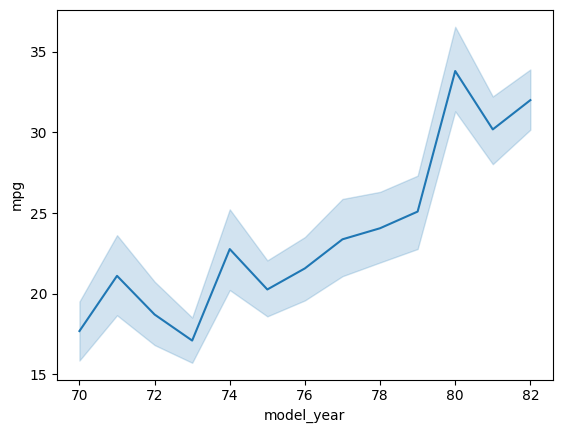

In [84]:
sns.lineplot(cars, x="model_year", y="mpg")

In [85]:

cars_describe = cars.describe()
cars_describe_styled = cars_describe.style.background_gradient()
dfi.export(cars_describe, "images/cars_describe.png")


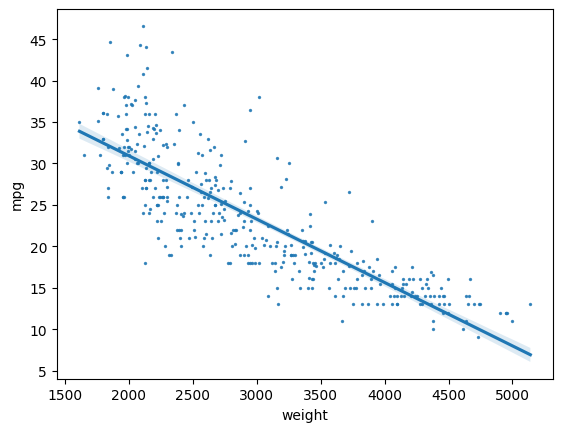

In [86]:

ax = sns.regplot(cars, x="weight", y="mpg", scatter_kws={"s":2})


plt.show()


<AxesSubplot: xlabel='cylinders', ylabel='acceleration'>

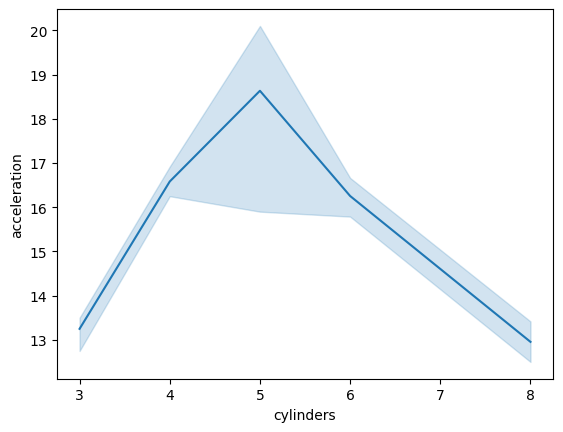

In [87]:
sns.lineplot(cars, x="cylinders", y="acceleration")

In [88]:
#test confidence interval: 5 cylinder/acceleration
import numpy as np
from scipy.stats import t

cyl_5 = cars[cars["cylinders"] == 5]
mean = np.mean(cyl_5["acceleration"])
std = np.std(cyl_5["acceleration"], ddof=1)
n = len(cyl_5)

alpha = 0.05
t_crit = t.ppf(1-alpha/2, n-1)
sem = std / np.sqrt(n)

upper = mean - t_crit * sem
lower = mean + t_crit * sem
print(upper, lower, mean, n)

12.747796470637667 24.518870196029 18.633333333333333 3


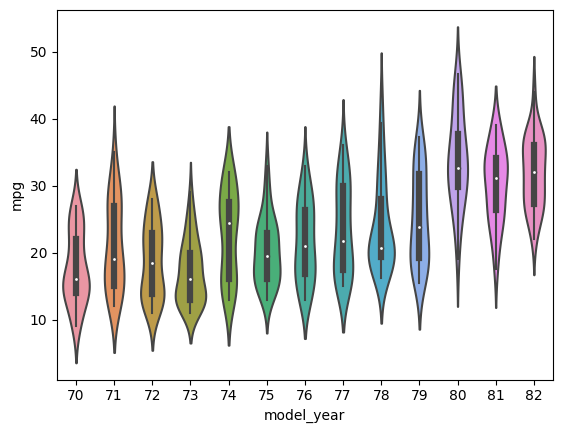

In [89]:
sns.violinplot(cars, x="model_year", y="mpg")
plt.savefig("images/violin_model_year_mpg.png")

In [90]:
stats.linregress(x=cars["weight"], y=cars["mpg"])

LinregressResult(slope=-0.007647342535779579, intercept=46.21652454901758, rvalue=-0.8322442148315754, pvalue=6.015296051435726e-102, stderr=0.00025796327827343185, intercept_stderr=0.7986724633128349)

[]

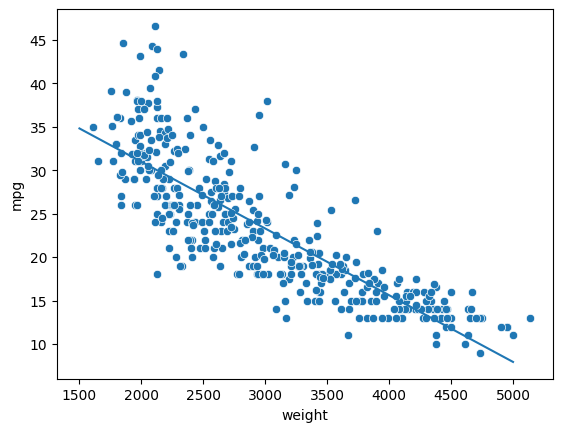

In [91]:
sns.scatterplot(cars, x="weight", y="mpg")

x = np.linspace(1500, 5000, 1000)
y = -0.00767661*x + 46.317
plt.plot(x, y)
plt.plot()

[]

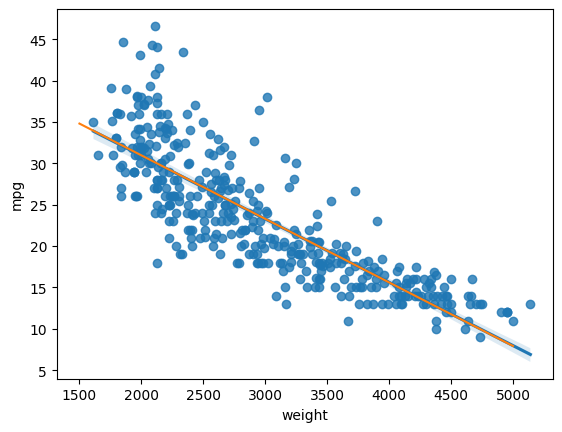

In [92]:
sns.regplot(cars, x="weight", y="mpg")
x = np.linspace(1500, 5000, 1000)
y = -0.00767661*x + 46.317
plt.plot(x, y)
plt.plot()

In [93]:
import statsmodels.formula.api as smf
results = smf.ols('mpg ~ model_year + weight', data=cars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     819.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          3.33e-140
Time:                        13:29:16   Log-Likelihood:                -1037.6
No. Observations:                 392   AIC:                             2081.
Df Residuals:                     389   BIC:                             2093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.3473      4.007     -3.581      0.000     -22.224      -6.470
model_year     0.7573      0.049     15.308      0.000       0.660       0.855
weight        -0.0066      0.000    -30.911      0.000      -0.007      -0.006
==============================================================================
Omnibus:                       42.504   Durbin-Watson:                   1.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.997
Skew:                           0.670   Prob(JB):                     2.32e-16
Kurtosis:                       4.616   Cond. No.                     7.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
stats.linregress(x=cars["model_year"], y=cars["mpg"])

LinregressResult(slope=1.2300354634480315, intercept=-70.0116740901433, rvalue=0.5805409660907856, pvalue=1.0757935564158027e-36, stderr=0.08735748304255507, intercept_stderr=6.645162449478237)

In [95]:
results = smf.ols('mpg ~ model_year', data=cars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     198.3
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.08e-36
Time:                        13:29:16   Log-Likelihood:                -1280.6
No. Observations:                 392   AIC:                             2565.
Df Residuals:                     390   BIC:                             2573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -70.0117      6.645    -10.536      0.000     -83.076     -56.947
model_year     1.2300      0.087     14.080      0.000       1.058       1.402
==============================================================================
Omnibus:                       21.407   Durbin-Watson:                   0.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.843
Skew:                           0.387   Prob(JB):                     0.000363
Kurtosis:                       2.391   Cond. No.                     1.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

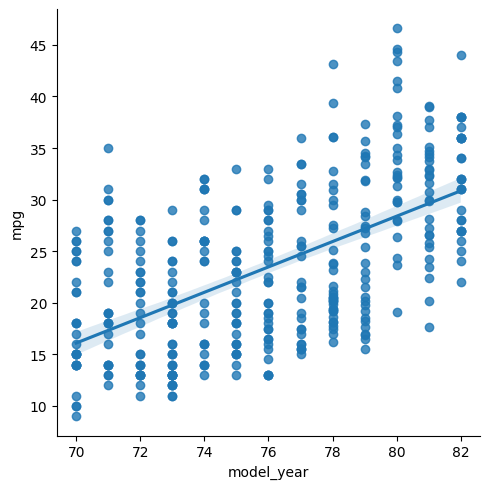

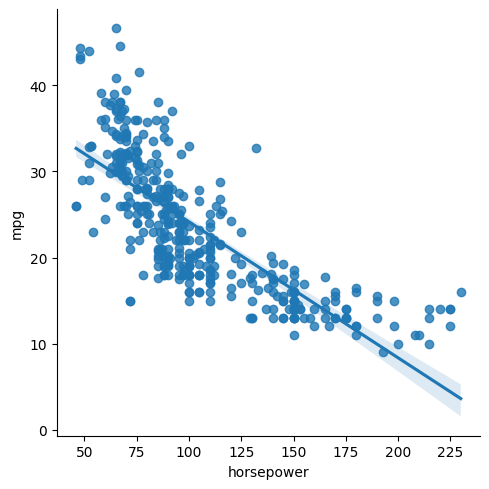

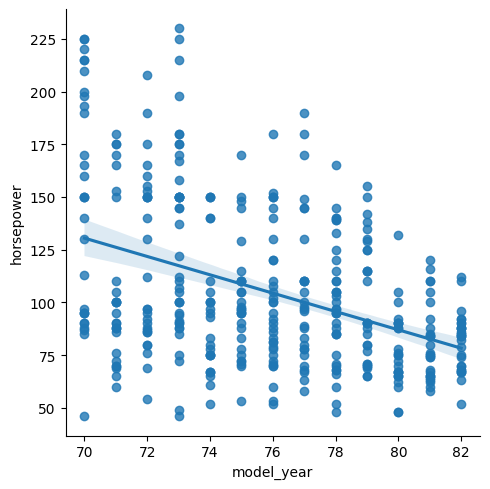

In [109]:
sns.lmplot(data=cars, x="model_year", y="mpg")
plt.savefig("images/model_year_mpg.png")
sns.lmplot(data=cars, x="horsepower", y="mpg")
plt.savefig("images/horsepower_mpg.png")
sns.lmplot(data=cars, x="model_year", y="horsepower")
plt.savefig("images/model_year_horsepower.png")

In [112]:
results = smf.ols("mpg ~ model_year + horsepower", data=cars).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     423.9
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.94e-98
Time:                        13:50:21   Log-Likelihood:                -1134.5
No. Observations:                 392   AIC:                             2275.
Df Residuals:                     389   BIC:                             2287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.7392      5.349     -2.382      0.018     -23.256      -2.223
model_year     0.6573      0.066      9.919      0.000       0.527       0.788
horsepower    -0.1317      0.006    -20.761      0.000      -0.144      -0.119
==============================================================================
Omnibus:                       11.834   Durbin-Watson:                   1.054
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.068
Skew:                           0.400   Prob(JB):                      0.00240
Kurtosis:                       3.316   Cond. No.                     3.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
results = smf.ols('mpg ~ model_year + horsepower', data=cars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     423.9
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.94e-98
Time:                        14:00:12   Log-Likelihood:                -1134.5
No. Observations:                 392   AIC:                             2275.
Df Residuals:                     389   BIC:                             2287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.7392      5.349     -2.382      0.018     -23.256      -2.223
model_year     0.6573      0.066      9.919      0.000       0.527       0.788
horsepower    -0.1317      0.006    -20.761      0.000      -0.144      -0.119
==============================================================================
Omnibus:                       11.834   Durbin-Watson:                   1.054
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.068
Skew:                           0.400   Prob(JB):                      0.00240
Kurtosis:                       3.316   Cond. No.                     3.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


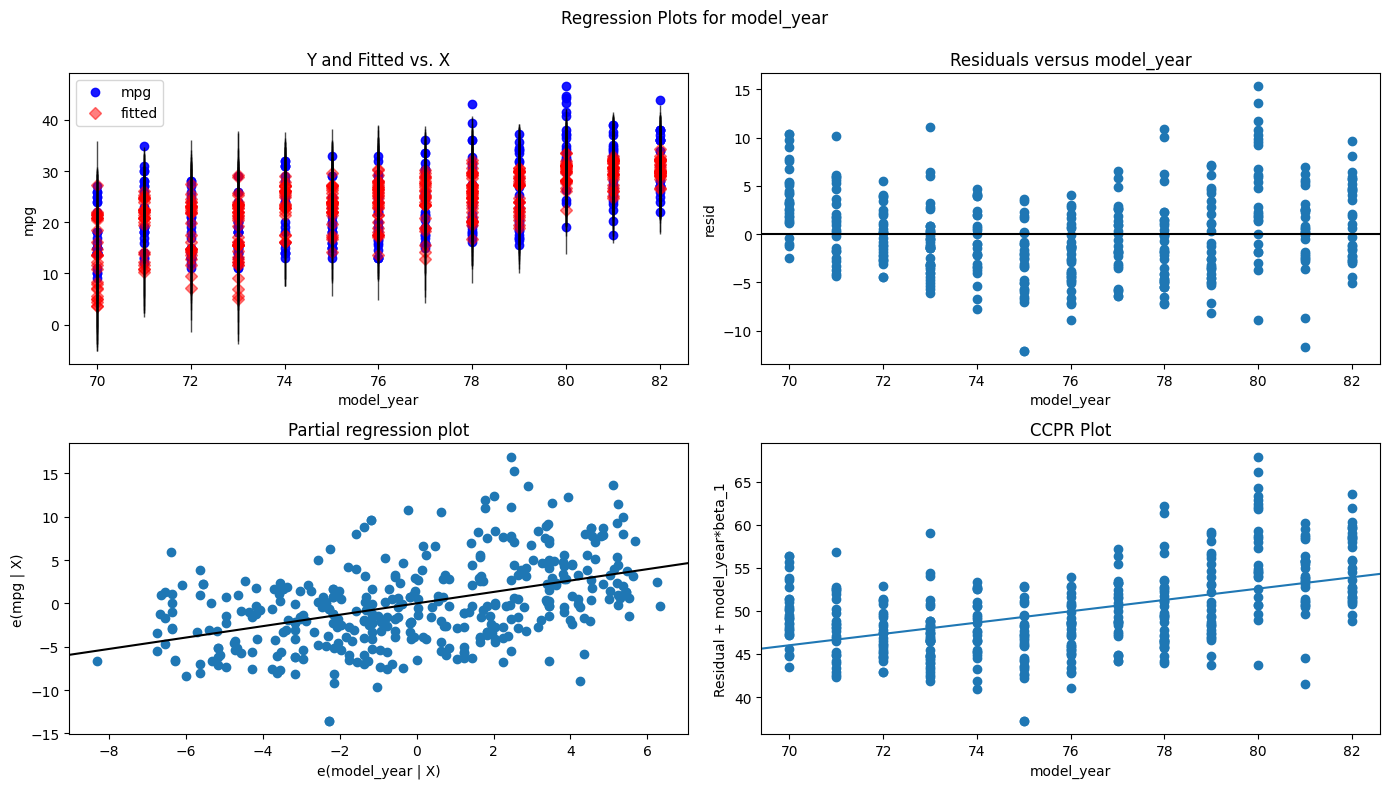

In [125]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(results,
                                    'model_year',
                                    fig=fig)